<span style="font-size:3em;font-weight:500">Стабилизация перевёрнутого маятника с неподвижной осью подвеса</span>

<span style="font-size:2em;font-weight:500">Расчётно-графическая работа для лабораторного практикума. Задания. Часть 1. Линейные и нелинейные стратегии управления</span>

**Автор: В. А. Костин**  

**2025 год**
$\newcommand{\ctg}{\mathop{\mathrm{ctg}}\nolimits}$
$\newcommand{\tg}{\mathop{\mathrm{tg}}\nolimits}$
$\newcommand{\arctg}{\mathop{\mathrm{arctg}}\nolimits}$
$\newcommand{\degree}{^{\circ}}$
$\renewcommand{\Re}{\mathop{\mathrm{Re}}\nolimits}$
$\newcommand{\D}{\mathrm{d}}$

# Задание 1. Инициализация параметров маятника

*Запишите в соответствующие переменные номер группы, фамилию, имя и отчество выполняющего работу.* *После этого запустите на выполнение изменённую ячейку и три следующие ячейки с кодом*. Запустить на выполнение текущую (в которой находится курсов) ячейку можно с помощью сочетания клавиш `Shift` и `Enter` или с помощью кнопки `Run` на панели инструментов. В результате выполнения этих ячеек будут исполнены подготовительные инструкции, подключены необходимые научные пакеты и вспомогательный модуль `control_theory`. Кроме этого будут созданы индивидуальные виртуальные маятники `p1` и `p2` со случайно сгенерированными параметрами (на основе предоставленных данных в качестве зерна случайной генерации). Для маятника `p1` управляющим воздействием является внешний момент сил, а для маятника `p2`&nbsp;— горизонтальная сила; оба маятника имеют одну и ту же частоту и коэффициент затухания. При перезапуске ядра Python необходимо каждый раз запускать эти четыре ячейки заново. Перед выходом или обновлением страницы используйте кнопку сохранения `Save and create checkpoint` (с пиктограммой, изображающей мягкий магнитный диск) или соответствующий пункт в меню `File` или сочетание клавиш `Control` и `S`.

## Решение

In [5]:
student_group = 'Группа'
student_first_name = 'Имя'
student_father_name = 'Отчество'
student_last_name = 'Фамилия'

## Подключение и настройка необходимых модулей, инициализация маятника со случайно сгенерированными параметрами

In [7]:
# Подключение объектов из библиотек numpy и matplotlib для более удобной
# дальнейшей интерактивной работы
from pylab import *

# Подключение объектов из вспомогательного модуля control_theory
from control_theory import *

# Импорт функции `HTML` для отображения произвольного кода HTML в выводе
# ячейки
from IPython.display import HTML, Video, Image

In [8]:
# Настройка вывода рисунков Matplotlib для интерактивной работы. Параметр
# inline указывает на то, что рисунки matplotlib должны быть встроены как
# растровые изображения, для интерактивных рисунков на javascript можно
# использовать параметр notebook вместо inline. Команда %matplotlib --list
# выводит список возможных типов вывода (бэкендов).
%matplotlib inline

# Настройка размеров и разрешения рисунков (960x720 по умолчанию, можно
# изменить для комфортной работы на мониторах с малым разрешением)
rcParams['figure.figsize'] = (9.6, 7.2) # Размер рисунков по умолчанию
rcParams['figure.dpi'] = 100 # Разрешение рисунков по умолчанию

rcParams['animation.embed_limit'] = 2.5 # Максимальный размер анимации в МБ
rcParams['animation.html'] = 'html5' # Представление анимаций matplotlib 

In [9]:
# Инициализация индивидуального маятника обучающегося
seed = (int(hashlib.md5((student_group
                         + student_first_name
                         + student_father_name
                         + student_last_name).encode('utf-8')).hexdigest(), 16)
        % 2**32)
np.random.seed(seed)

temp = np.random.rand(2)
p1 = PendulumTorque(0.3 + 1.5*temp[0], 0.01 + 0.1*temp[1]) 
p2 = PendulumHorizontalForce(0.3 + 1.5*temp[0], 0.01 + 0.1*temp[1])

# Вывод параметров маятника
print(p1, p2, sep='\n')

Pendulum controlled by applied torque: omega = 0.99, nu = 0.11
Pendulum controlled by applied horizontal force: omega = 0.99, nu = 0.11


# Задание 2. Движение маятника без управления с разными начальными условиями
<a id="sec:pr2"></a>

Рассмотрите поведение маятника `p1` с нулевым управлением для нескольких вариантов начальных условий. Рассмотрите начальные условия, в которых имеется ненулевая начальная скорость $\dot\varphi(t = 0) \neq 0$. Если необходимо, изменяйте параметры расчёта (время и шаг интегрирования) и анимация (скорость и количество кадров) для лучшего соответствия выбранным начальным условиям. *Приведите примеры (в виде графиков и анимаций) четырёх случаев:*
- 1 — 3\) *когда маятник начинает своё движение из нижнего положения и совершает 1, 2 и 5 полных оборотов, прежде чем вновь останавливается в нижнем положении;*
- 4\) *когда маятник начинает своё движение из горизонтального положения, поднимается, проходит через верхнее положение, падает к нижнему и вновь поднмимается к начальному горизонтальному положению, затем останавливается, не доходя до верхнего положения и возвращается в нижнее положение.*

Для расчёта временной эволюции состояния маятника можно использовать функцию `integrate`, описанную в&nbsp;[приложении&nbsp;4.14](supplementary_materials.ipynb#integrate). Пример использования этой функции можно увидеть ниже в решении и в&nbsp;[приложении&nbsp;5.2](supplementary_materials.ipynb#sec:ex1). Для представления результатов расчёта можно использовать стандартную функцию для построения графиков `plot` из пакета Matplotlib и описанную в разделе&nbsp;[приложении&nbsp;4.15](supplementary_materials.ipynb#animate_pendulum) функцию `animate_pendulum` для построения анимаций движения маятника на каретке (см. примеры использования в [приложении&nbsp;5.2](supplementary_materials.ipynb#sec:ex1), примеры использования функции `plot` можно также увидеть в [приложении&nbsp;3.2](supplementary_materials.ipynb#sec:ex_plot) и [приложении&nbsp;3.3](supplementary_materials.ipynb#sec:ex_subplot)).

## Пример без оборота

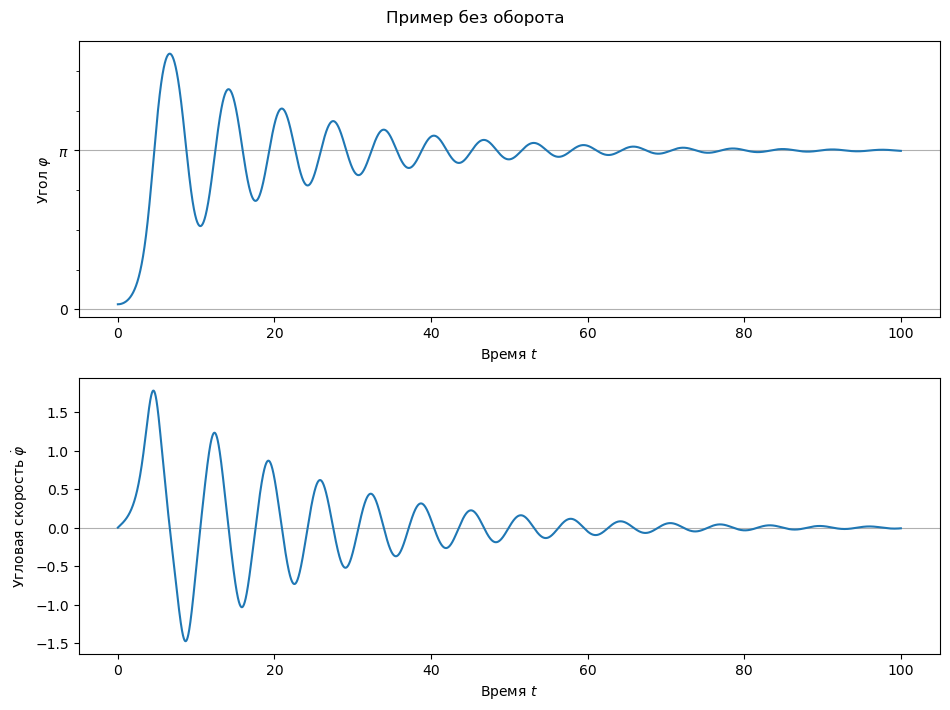

In [13]:
# Нулевое управление
c0 = LinearStateControl(2, 1)
# Численное интегрирование методом Рунге — Кутты
t, s = integrate(p1, c0, x0=[0.1, 0.], v0=empty(0), dt=0.01, T=100, N=1)

# Построение графиков решения
subplot(2, 1, 1) # Первая панель составного рисунка
axis_pi_ticks(gca().yaxis, pi, pi/4) # Расстановка рисок вертикальной оси
                                     # с периодичностью pi и pi/4
grid(axis='y') # Горизонтальная сетка
plot(t, s[:, 0]) # Построение зависимости угла от времени
xlabel(r'Время $t$') # Подпись по нижнему краю коробки осей
ylabel(r'Угол $\varphi$') # Подпись по левому краю коробки осей 

subplot(2, 1, 2) # Вторая панель составного рисунка
axhline(0, lw=rcParams['grid.linewidth'], ls=rcParams['grid.linestyle'],
        c=rcParams['grid.color']) # Горизонтальная ось на нулевом уровне
plot(t, s[:, 1])
xlabel(r'Время $t$')
ylabel(r'Угловая скорость $\dot\varphi$')
suptitle(r'Пример без оборота') # Общий заголовок рисунка
tight_layout(); # Корректировка расстояний между краями рисунка и осями панелей

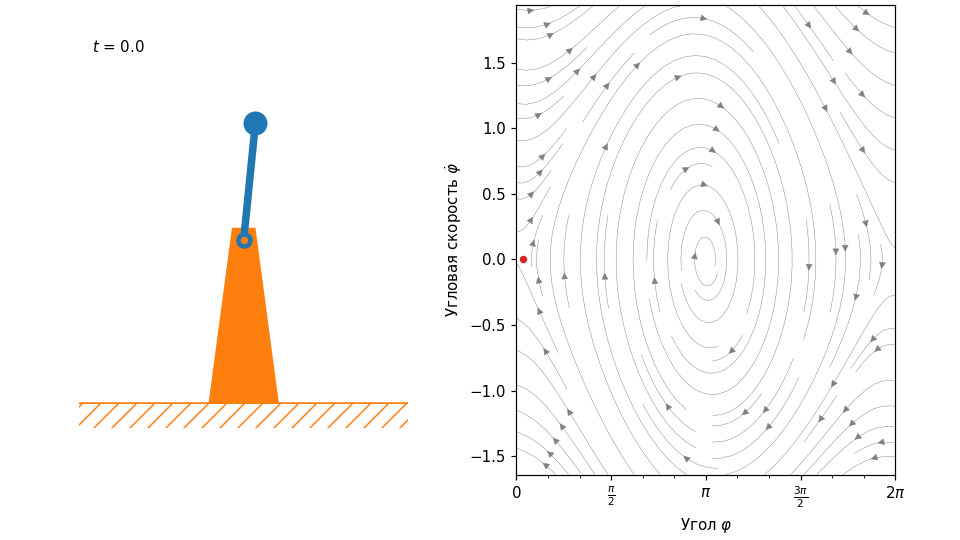

In [14]:
# Построение анимированного изображения gif
anim = animate_pendulum(t, s, phi_lims=(0, 2*pi), phase_portrait=[p1, c0],
                        spacing=30, invsec=1, filename='temp/test2.gif')
Image('temp/test2.gif')

# Раскомментируйте для построения видео mp4 (ffmpeg должен быть установлен)
#anim = animate_pendulum(t, s, phi_lims=(0, 2*pi), phase_portrait=[p1, c0],
#                        spacing=30, invsec=1, filename='temp/test2.mp4')
#Video('temp/test2.mp4')

# Раскомментируйте для создания анимации на JavaScript
#anim = animate_pendulum(t, s, phi_lims=(0, 2*pi), phase_portrait=[p1, c0],
#                        spacing=30, invsec=1)
#HTML(anim.to_jshtml())

## Решение

### 2.1. Пример с маятником, совершающим один полный оборот

In [17]:
# Вставьте и запустите код для построения графиков временной реализации

In [18]:
# Вставьте и запустите код для построения анимации

### 2.2. Пример с маятником, совершающим два полных оборота

In [20]:
# Вставьте и запустите код для построения графиков временной реализации

In [21]:
# Вставьте и запустите код для построения анимации

### 2.3. Пример с маятником, совершающим пять полных оборотов

In [23]:
# Вставьте и запустите код для построения графиков временной реализации

In [24]:
# Вставьте и запустите код для построения анимации

### 2.4. Пример с маятником, совершающим один оборот из горизонтального положения

In [26]:
# Вставьте и запустите код для построения графиков временной реализации

In [27]:
# Вставьте и запустите код для построения анимации

# Задание 3. Линеаризация и линейное управление по состоянию
<a id="sec:pr3"></a>

Изучение линейных регуляторов для рассматриваемой системы начинается с линеаризации уравнений&nbsp;[$(4)$](description.ipynb#eq:phi) и [$(8)$](description.ipynb#eq:phi-cos) вблизи $\varphi = 0$. Как было сказано в разделе [2.5](description.ipynb#sec2.5)
описания работы, линеаризация обоих уравнений совпадает,
$$
\ddot\varphi + \nu\dot\varphi - \Omega^2 \varphi = -u.
$$
Линейная стратегия управления по состоянию имеет вид $u = k_0 \varphi + k_1 \dot\varphi$. Подстановка этой в стратегии в линеаризованное уравнение приводит к линейному однородному обыкновенному дифференциальному уравнению второго порядка с постоянными коэффициентами, которое записывается как
$$
\ddot\varphi + (\nu + k_1)\dot\varphi + (k_0 - \Omega^2) \varphi = 0.
$$
Как известно, состояние равновесия этого уравнения грубо устойчиво, если все коэффициенты (включая коэффициент при старшей производной) одного знака. Таким образом, верхнее положение равновесия в замкнутой системе устойчиво, если $\nu + k_1 > 0$ и $k_0 - \Omega^2 > 0$, то есть $k_1 > -\nu$ и $k_0 > \Omega^2$. При этих условиях уравнение замкнутой системы является уравнением гармонического осциллятора с затуханием. При этом точка $(\varphi, \dot\varphi) = (0, 0)$ может быть устойчивым фокусом либо устойчивым узлом. В первом случае процесс установления происходит с переколебаниями (квазигармонически) и значение $\varphi$ бесконечное число раз обращается в $0$, а во-втором чисто ангармонически и значение $\varphi$ обращается в $0$ не более одного раза. *Запишете аналитические условия, при которых в процессе установления происходит бесконечное число переколебаний, и при которых&nbsp;— конечное. Постройте карты областей в плоскости $(k_0, k_1)$ для маятника `p1`, в которых верхнее положения соответствует устойчивому узлу, устойчивому фокусу или неусточивому равновесию. Для случая управления только по углу ($k_1 = 0$) определите численно интервал значений коэффициента $k_0$, где верхнее положение является устойчивым узлом.*

## Пример построения карты устойчивости для уравнения $\ddot x + a \dot x + b x = 0$ 

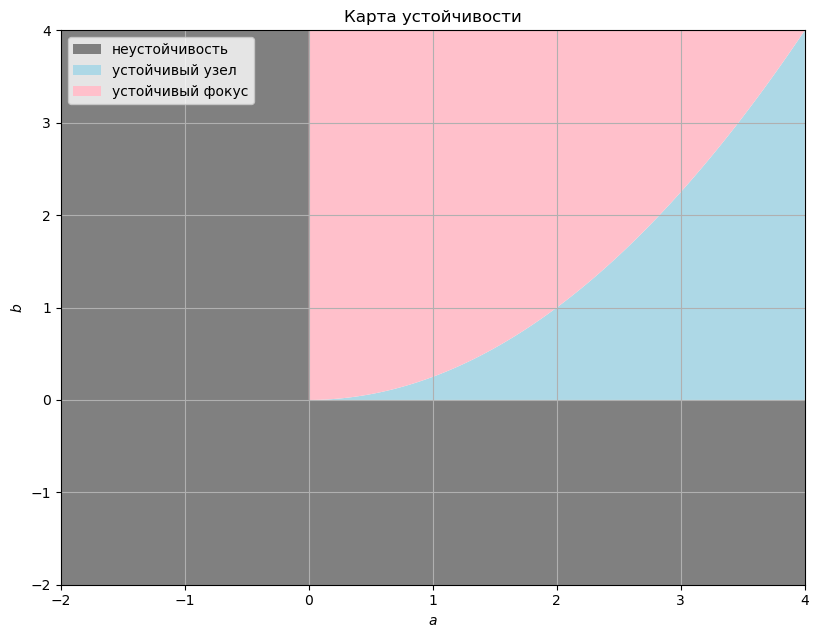

In [31]:
# Определение границ коробки осей
a_min = -2
a_max = 4
b_min = -2
b_max = 4

# Функция fill_between используется для закраски области между двумя кривыми,
# заданными посредством общего набора абсцисс и двумя наборами соответствующих
# этим абсциссам ординат
unstable = fill_between([a_min, 0, 0, a_max], [b_min, b_min, b_min, b_min],
                        [b_max, b_max, 0, 0], fc='grey', label='неустойчивость')

a = linspace(0, a_max, 201) # Эквидистантный массив от 0 до a_max из 101 точки
node = fill_between(a, 0, a**2/4, fc='lightblue', label='устойчивый узел')
focus = fill_between(a, a**2/4, b_max, fc='pink', label='устойчивый фокус')

# Установка границ коробки осей
axis([a_min, a_max, b_min, b_max])

xlabel('$a$')
ylabel('$b$')

# Легенда карты
legend(loc='upper left')

grid()
title(r'Карта устойчивости');

## Решение

### 3.1. Аналитические условия для устойчивых узла и фокуса

*Запишите аналитические условия здесь.*

### 3.2. Карта областей устойчивости и неустойчивости

In [36]:
# Вставьте и запустите код для построения карты устойчивости

### 3.3. Интервал значений $k_0$ для устойчивого узла при $k_1 = 0$

In [38]:
# Замените 50 и 51 на код для границ интервала и запустите ячейку
print('Интервал значений k_0: ({0:.7g}, {1:.7g})'
      .format(50, 51))

Интервал значений k_0: (50, 51)


# Задание 4. Динамика угла отклонения при стабилизации перевёрнутого маятника, управляемого моментом сил
<a id="sec:pr4"></a>

Для маятника `p1` (c управлением моментом сил) рассмотрите динамику стабилизации, построив временные зависимости угла отклонения $\varphi$ и управления $u$ для различных начальных условий и различных значений $k_0$ и $k_1$. *Приведите четыре примера (графики и анимации) стабилизации положения маятника с разными $k_0$ и $k_1$:*
- 1\) *начальный угол отклонения равен 60°, начальная скорость отсутствует, а маятник приходит к состоянию равновесия ангармонически, совершая не более одного переколебания;*
- 2\) *начальный угол отклонения равен 60°, начальная скорость отсутствует, а маятник приходит к состоянию равновесия квазигармонически, совершая экспоненциально затухающие колебания;*
- 3\) *начальный угол отклонения равен 60°, начальная скорость отсутствует, управление осуществляется только по углу (то есть $k_1 = 0$), а маятник приходит к состоянию равновесия ангармонически;*
- 4\) *начальный угол отклонения равен 540°, начальная скорость отсутствует.*
 
*Во всех примерах подбирайте интервал расчётного времени (параметр `T` функции `integrate`) так, чтобы процесс установления завершался около этого времени). Для выбранных значений $k_0$ и $k_1$ убедитесь в выполнении полученных в [задании 3](#sec:pr3)) условий и отметьте выбранные точки на карте устойчивости в плоскости $(k_0, k_1)$. Обратите внимание, сколько переколебаний и оборотов делает маятник в последних двух примерах. Поясните, почему число переколебаний может быть больше одного в случае, когда положение равновесия является устойчивым узлом.*

Пример использования функции `integrate` для расчёта маятника с управлением по углу можно увидеть в&nbsp;[приложении&nbsp;5.2](supplementary_materials.ipynb#sec:ex1).

## Пример без стабилизации верхнего положения равновесия

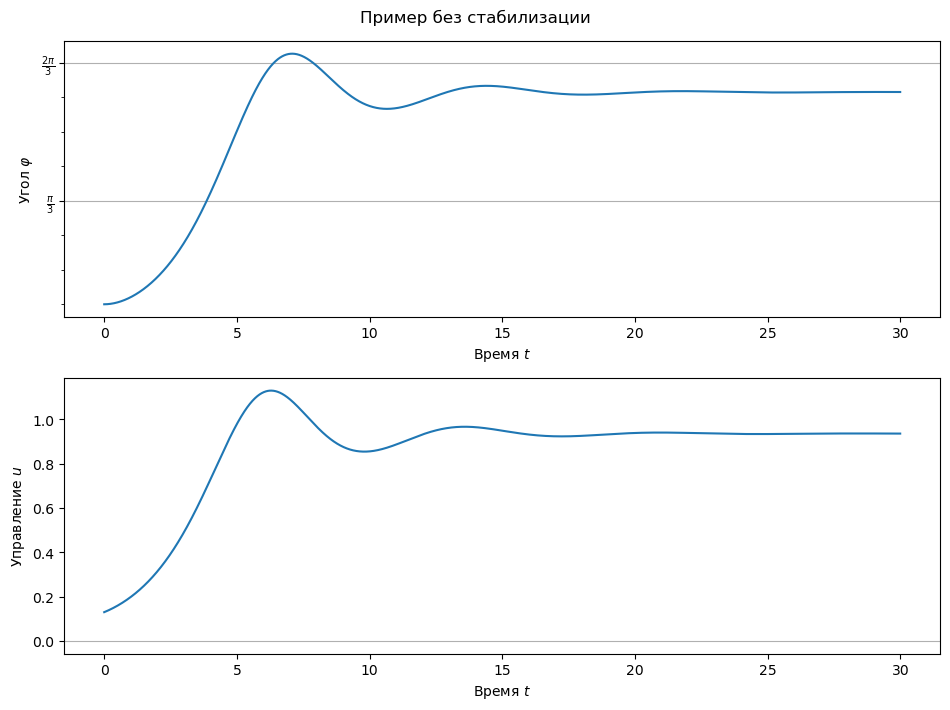

In [42]:
# Управление с k_0 = 0.5, k_1 = 0.4
c = LinearStateControl(2, 1, [0.5, 0.4])
# Численное интегрирование методом Рунге — Кутты с выводом управления
# начальным углом 15° и нулевой начальной скоростью
t, s, u = integrate(p1, c, x0=[pi/12, 0], v0=empty(0), dt=0.01, T=30, N=1,
                    return_control=True)

subplot(2, 1, 1)
plot(t, s[:, 0])
axis_pi_ticks(gca().yaxis, pi/3, pi/12, 3)
grid(axis='y')
xlabel(r'Время $t$')
ylabel(r'Угол $\varphi$')
subplot(2, 1, 2)
plot(t, u[:, 0])
axhline(0, lw=rcParams['grid.linewidth'], ls=rcParams['grid.linestyle'],
        c=rcParams['grid.color'])
xlabel(r'Время $t$')
ylabel(r'Управление $u$')
suptitle(r'Пример без стабилизации')
tight_layout();

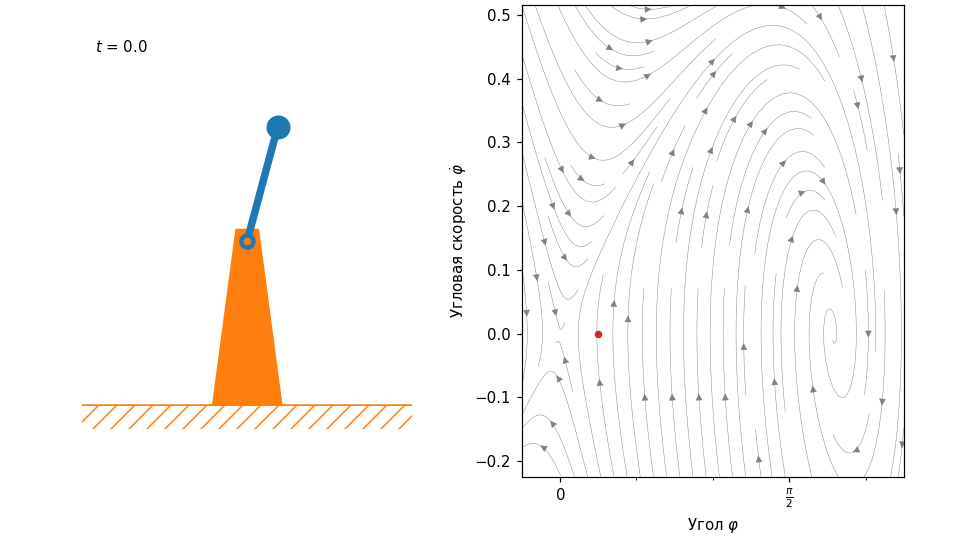

In [43]:
# Построение анимированного изображения gif
anim = animate_pendulum(t, s, phi_lims=(-pi/12, 3*pi/4), phase_portrait=[p1, c],
                        cylinder_mode=False, spacing=30, invsec=1,
                        filename='temp/test4.gif')
Image('temp/test4.gif')

# Раскомментируйте для построения видео mp4 (ffmpeg должен быть установлен)
#anim = animate_pendulum(t, s, phi_lims=(-pi/12, 3*pi/4), phase_portrait=[p1, c],
#                        cylinder_mode=False, spacing=30, invsec=1,
#                        filename='temp/test4.mp4')
#Video('temp/test4.mp4')

# Раскомментируйте для создания анимации на JavaScript
#anim = animate_pendulum(t, s, phi_lims=(-pi/12, 3*pi/4), phase_portrait=[p1, c],
#                        cylinder_mode=False, spacing=30, invsec=1)
#HTML(anim.to_jshtml())

## Пример карты устойчивости для системы $\ddot x + a \dot x + b x = 0$ с четырьмя отмеченными точками

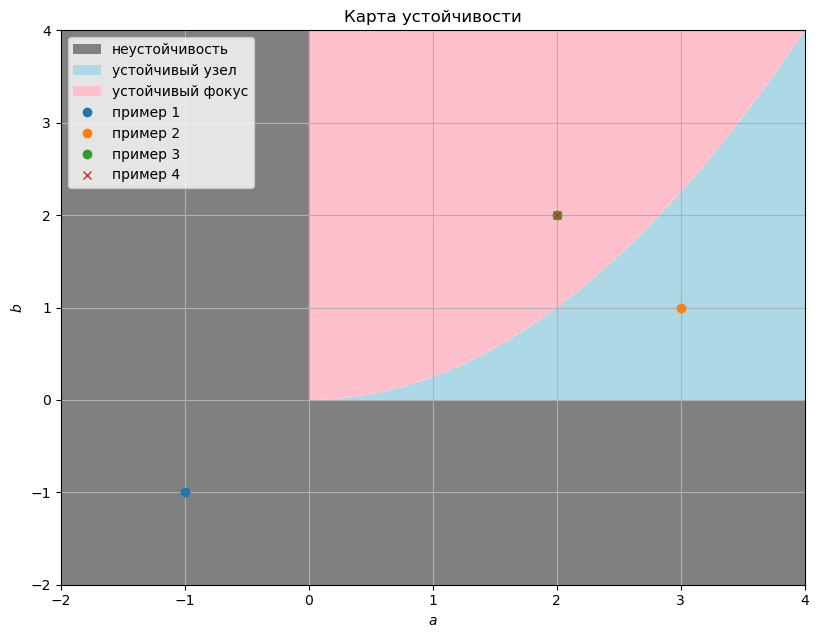

In [45]:
# Определение границ коробки осей
a_min = -2
a_max = 4
b_min = -2
b_max = 4

# Функция fill_between используется для закраски области между двумя кривыми,
# заданными посредством общего набора абсцисс и двумя наборами соответствующих
# этим абсциссам ординат
unstable = fill_between([a_min, 0, 0, a_max], [b_min, b_min, b_min, b_min],
                        [b_max, b_max, 0, 0], fc='grey', label='неустойчивость')

a = linspace(0, a_max, 201) # Эквидистантный массив от 0 до a_max из 101 точки
node = fill_between(a, 0, a**2/4, fc='lightblue', label='устойчивый узел')
focus = fill_between(a, a**2/4, b_max, fc='pink', label='устойчивый фокус')

# Точка в серой области
dot1, = plot([-1], [-1], 'o', label='пример 1')
# Точка в голубой области
dot2, = plot([3], [1], 'o', label='пример 2')
# Точка в розовой области
dot3, = plot([2], [2], 'o', label='пример 3')
# Та же точка в розовой области
dot4, = plot([2], [2], 'x', label='пример 4')

# Установка границ коробки осей
axis([a_min, a_max, b_min, b_max])

xlabel('$a$')
ylabel('$b$')

# Легенда карты
legend(loc='upper left')

grid()
title(r'Карта устойчивости');

## Решение

### 4.1. Ангармоническая стабилизация верхнего положения маятника

In [48]:
# Вставьте и запустите код для построения графиков временной реализации

In [49]:
# Вставьте и запустите код для построения анимации (необязательно)

### 4.2. Квазигармоническая стабилизация верхнего положения маятника

In [51]:
# Вставьте и запустите код для построения графиков временной реализации

In [52]:
# Вставьте и запустите код для построения анимации (необязательно)

### 4.3. Ангармоническая стабилизация верхнего положения маятника посредством управления только по углу

In [54]:
# Вставьте и запустите код для построения графиков временной реализации

In [55]:
# Вставьте и запустите код для построения анимации (необязательно)

### 4.4 Стабилизация верхнего положения маятника из большого начального отклонения

In [57]:
# Вставьте код для построения графиков временной реализации

In [58]:
# Вставьте код для построения анимации (необязательно)

### 4.5. Карта устойчивости с отмеченными точками, соответствующими примерам 4.1 — 4.4

In [60]:
# Вставьте и запустите код для построения карты устойчивости с отмеченными
# точками

### 4.6. Пояснение о числе переколебаний в примере с ангармоническим установлением и управлением только по углу

*Запишите объяснение для рассчитанных зависимостей в пункте 4.3.*

# Задание 5. Динамика угла отклонения при стабилизации перевёрнутого маятника, управляемого горизонтальной силой
<a id="sec:pr5"></a>

Теперь следует попытаться стабилизировать маятник `p2` (c управлением горизонтальной силой). *Попробуйте построить четыре примера из [задания 4](#sec:pr4). Сначала используйте те же самые четыре набора начальных условий и значений коэффициентов $k_0$ и $k_1$ стратегии управления, что и в [задании 4](#sec:pr4). Если эти наборы не позволяют достигнуть необходимых условий измените значения коэффициентов стратегии управления (в примерах 1, 2 и 4) или начального угла отклонения (в примере 3). Поясните, как и почему пришлось изменить значения коэффициентов и начальных условий. Приведите также пример, когда верхнее положение является устойчивым, но маятник к нему не приходит. Поясните, почему это случается для маятника `p2`, но не имело места при рассмотрении маятника `p1`. Также к в [задания 4](#sec:pr4) для выбранных значений $k_0$ и $k_1$ убедитесь в выполнении полученных в [задании 3](#sec:pr3)) условий и отметьте выбранные точки на карте устойчивости в плоскости $(k_0, k_1)$.*

Пример использования функции `integrate` для расчёта маятника с управлением по углу можно увидеть в&nbsp;[приложении&nbsp;5.2](supplementary_materials.ipynb#sec:ex1).

## Решение

### 5.1. Ангармоническая стабилизация верхнего положения маятника

In [67]:
# Вставьте и запустите код для построения графиков временной реализации

In [68]:
# Вставьте и запустите код для построения анимации (необязательно)

### 5.2. Квазигармоническая стабилизация верхнего положения маятника

In [70]:
# Вставьте и запустите код для построения графиков временной реализации

In [71]:
# Вставьте и запустите код для построения анимации (необязательно)

### 5.3. Ангармоническая стабилизация верхнего положения маятника посредством управления только по углу

In [73]:
# Вставьте и запустите код для построения графиков временной реализации

In [74]:
# Вставьте и запустите код для построения анимации (необязательно)

### 5.4. Стабилизация верхнего положения маятника из большого начального отклонения

In [76]:
# Вставьте и запустите код для построения графиков временной реализации

In [77]:
# Вставьте и запустите код для построения анимации (необязательно)

### 5.5. Маятник, не приходящий в верхнее устойчивое положение

In [79]:
# Вставьте и запустите код для построения графиков временной реализации

In [80]:
# Вставьте и запустите код для построения анимации (необязательно)

### 5.6. Карта устойчивости с отмеченными точками, соответствующими примерам 5.1 — 5.5

In [82]:
# Вставьте и запустите код для построения карты устойчивости с отмеченными
# точками

### 5.7. Пояснение, как и почему пришлось изменять коэффициенты $k_{0, 1}$ или начальные условия в примерах 5.1 — 5.4 и почему пример 5.5 возможен для маятника `p2`, но не для `p1`

*Запишите объяснение для внесённых изменений в параметры для пунктов 5.1 — 5.4 (по сравнению с 4.1 — 4.4).*

*Запишите объяснение, почему маятник `p2` (в отличие от `p1`) не всегда приходит в верхнее положение, когда оно устойчиво.*

# Задание 6. Фазовые портреты нелинейной системы
<a id="sec:pr6"></a>

Чтобы разобраться в различиях межджу маятниками `p1` и `p2` можно обратиться к фазовым портретам соответствующих замкнутых систем. *С помощью функции `streamplot` библиотеки `matplotlib` постройте на плоскости $(\varphi, \dot\varphi)$ пять фазовых портретов замкнутых нелинейных систем: один потрет с управлением $u = \frac{\Omega^2}2 \varphi$ для маятника `p1` и по два портрета для каждого из маятников с управлением вида $u = k_0 \varphi$ с двумя различными значениями $k_0$: одно отвечает устойчивому узлу в $(\varphi, \dot\varphi) = (0, 0)$, а другое&nbsp;— устойчивому фокусу. Отметьте различными цветами все устойчивые и неустойчивые состояния равновесия. Для сёдел на рисунке постройте устойчивые сепаратрисы. В случае фазовых потретов для маятника `p2` закрасьте область притяжения верхнего положения равновесия.* Пример использования функции `streamplot` приведён в&nbsp;[разделе&nbsp;3.4](supplementary_materials.ipynb#sec:ex_streamplot) приложения.

## Пример построения фазового портрета системы без управления

Система без управления имеет сёдла в точках $\varphi = \varphi_{\mathrm{s}} = 2\pi k$, $\dot\varphi = 0$. Линеаризованное уравнение замкнутой системы имеет вид $\ddot\varphi + \nu\dot\varphi - \Omega^2 (\varphi - \varphi_{\mathrm{s}}) = 0$ с характеристическим квадратным полиномом $Q(p) = p^2 + \nu p - \Omega^2$. Выражение для его отрицательного корня $p_{-} = -\nu/2 - \sqrt{\nu^2/4 + \Omega^2}$ используется ниже при построении сепаратрис.

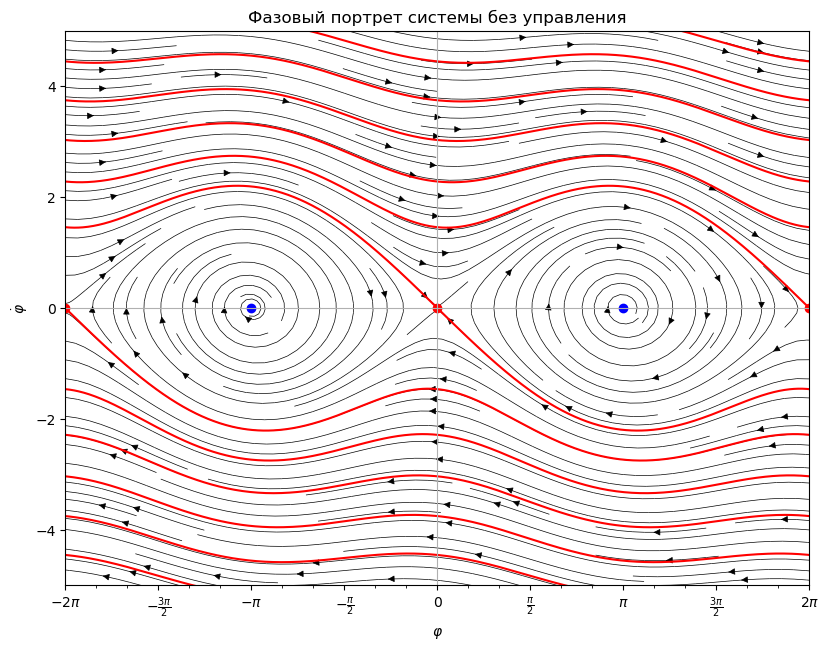

In [90]:
# Определение границ коробки осей
phimin = -2 * pi
phimax = 2 * pi
dphimin = -5
dphimax = 5

# Создание сеток переменных 201 на 201 элемента
phi, dphi = meshgrid(linspace(phimin, phimax, 201),
                     linspace(dphimin, dphimax, 201))

# Вычисление вертикальной компоненты векторного поля (горизонтальная
# компонента равна dphi и её не нужно специально вычислять)
ddphi = p1.omega**2*sin(phi) - p1.nu*dphi

# Построение фазовой плоскости: первые два аргумента задают сетку значений
# абсцисс и ординат, следующие два аргумента задают горизонтальную и
# вертикальную компоненты векторного поля
streamplot(phi, dphi, dphi, ddphi, linewidth=0.5, density=2., color='k')

# Точки устойчивого равновесия
plot([-pi, pi], [0, 0], 'bo')

# Точки неустойчивого равновесия
plot([-2*pi, 0, 2*pi], [0, 0, 0], 'ro')

# Расчёт устойчивой сепаратрисы седла (0, 0), приходящей снизу справа
l = 1e-3 # Малый сдвиг относительно седла по горизонтали
pm = -0.5*p1.nu-sqrt(0.25*p1.nu**2+p1.omega**2) # Отрицательный корень
                                                # характеристического полинома
                                                # уравнения, линеаризованного
                                                # около седла
c = LinearStateControl(2, 1)
t1, s1 = integrate(p1, c, x0=[l, l*pm], v0=empty(0), dt=-0.01, T=-50, N=1,
                   stop_condition=lambda x, t: abs(x[1]) > 7.)

# Расчёт устойчивой сепаратрисы седла (0, 0), приходящей сверху слева
t2, s2 = integrate(p1, c, x0=[-l, -l*pm], v0=empty(0), dt=-0.01, T=-50, N=1,
                   stop_condition=lambda x, t: abs(x[1]) > 7.)

# Объединение двух сепартрис в одну кривую
s = vstack([s1[::-1], s2])

# Добавление сепаратрис на график с периодическим повторением по горизонтали
for i in range(-6, 7):
    plot(s[:, 0] + 2*pi*i, s[:, 1], 'r')

axis([phimin, phimax, dphimin, dphimax])
axis_pi_ticks(gca().xaxis, pi/2, pi/6)
axhline(0, lw=rcParams['grid.linewidth'], ls=rcParams['grid.linestyle'],
        c=rcParams['grid.color'])
axvline(0, lw=rcParams['grid.linewidth'], ls=rcParams['grid.linestyle'],
        c=rcParams['grid.color'])
xlabel(r'$\varphi$')
ylabel(r'$\dot\varphi$')
title(r'Фазовый портрет системы без управления');

## Пример численного решения уравнения $\sin\varphi = 0.5\varphi$

In [92]:
# Нахождение корня функции sin(phi) - 0.5*phi в интервале (1e-6, pi), на концах
# которого функция принимает значения разных знаков с помощью метода Брента
from scipy.optimize import brentq
brentq(lambda x: sin(x)-0.5*x, 1e-6, pi)

1.895494267033981

## Решение

### 6.1. Фазовый портрет маятника `p1` с управлением  $u = \frac{\Omega^2}2 \varphi$

In [95]:
# Вставьте и запустите код для нахождения нетривиальных состояний равновесия,
# которые присутствуют на фазовом портрете

*Запишите аналитические выражения для отрицательных корней характеристических полиномов уравнений, линеаризованных около сёдел.*

In [97]:
# Вставьте и запустите код для построения фазового портрета

### 6.2. Фазовый портрет маятника `p1` с управлением  $u = k_0 \varphi$ и устойчивым узлом

In [99]:
# Вставьте и запустите код для построения фазового портрета

In [100]:
# Вставьте и запустите код для построения фазового портрета (увеличенный 
# фрагмент около точки (0, 0))

### 6.3. Фазовый портрет маятника `p1` с управлением  $u = k_0 \varphi$ и устойчивым фокусом

In [102]:
# Вставьте и запустите код для построения фазового портрета

### 6.4. Фазовый портрет маятника `p2` с управлением  $u = k_0 \varphi$ и устойчивым узлом

In [104]:
# Вставьте и запустите код для нахождения нетривиальных состояний равновесия,
# которые присутствуют на фазовом портрете

*Запишите аналитические выражения для отрицательных корней характеристических полиномов уравнений, линеаризованных около сёдел.*

In [106]:
# Вставьте и запустите код для построения фазового портрета

In [107]:
# Вставьте и запустите код для построения фазового портрета (увеличенный 
# фрагмент около точки (0, 0))

### 6.5. Фазовый портрет маятника `p2` с управлением  $u = k_0 \varphi$ и устойчивым фокусом

In [109]:
# Вставьте и запустите код для нахождения нетривиальных состояний равновесия,
# которые присутствуют на фазовом портрете

In [110]:
# Вставьте и запустите код для построения фазового портрета

# Задание 7. Бифуркационные диаграммы

Как видно из фазовых портретов, полученных в [задании 6](#sec:pr6) структура фазовых потретов при смене устойчивости верхнего положения равновесия меняется качественно — происходит **бифуркация (_англ._ bifurcation)**. При этом для маятников `p1` и `p2` эти изменения-бифуркации также качественно отличается. В обоих случаях происходит бифуркация типа **«вилка» (_англ._ pitchfork)**: три состояния равновесия сливаются в одно. Однако в случае маятника `p1` эта бифуркация носит **нормальный** или **сверхкритический (_англ._ supercritical)** характер, а случае маятника `p2` происходит **обратная** или **докритическая (_англ._ subcritical)** бифуркация. Проиллюстрировать разницу и происхождение название бифуркации помогут бифуркационные диаграммы, которые в данном случае могут представлять графики положений состояний равновесия различных типов в зависимости от значения коэффициента $k_0$ (при $k_1 = 0$). *Постройте бифуркационные диаграммы для маятников `p1` и `p2`. Линии отвечающие устойчивым и неустойчивым состояниям равновесия изобразите разными цветами, вынеся значения цветов в легенду.* Для маятника `p2` устойчивые сепаратрисы возникающих сёдел ограничивают область притяжения верхнего положения равновесия, а абсциссы седёл ограничивают интервал начальных углов отклонения, откуда маятник с нулевой начальной скоростью поднимается в верхнее положение равновесия. Это позволяет записать аналитически условие на коэффициент $k_0$ линейной стратегии управления, необходимое, для того чтобы маятник поднимался вверх из любого состояния на отрезке $|\varphi| \leqslant \varphi_{\mathrm{c}}$, $\dot\varphi = 0$. *Запишите это условие. Объясните, что происходит при $\varphi_{\mathrm{c}} \to 90\degree$ и $\varphi_{\mathrm{c}} > 90\degree$. Поясните, почему несмотря на это в [задании 5](#sec:pr5)  всё же удалось поднять маятник при угле отклонения $540\degree > 90\degree$*.

## Пример построение бифуркационной диаграммы

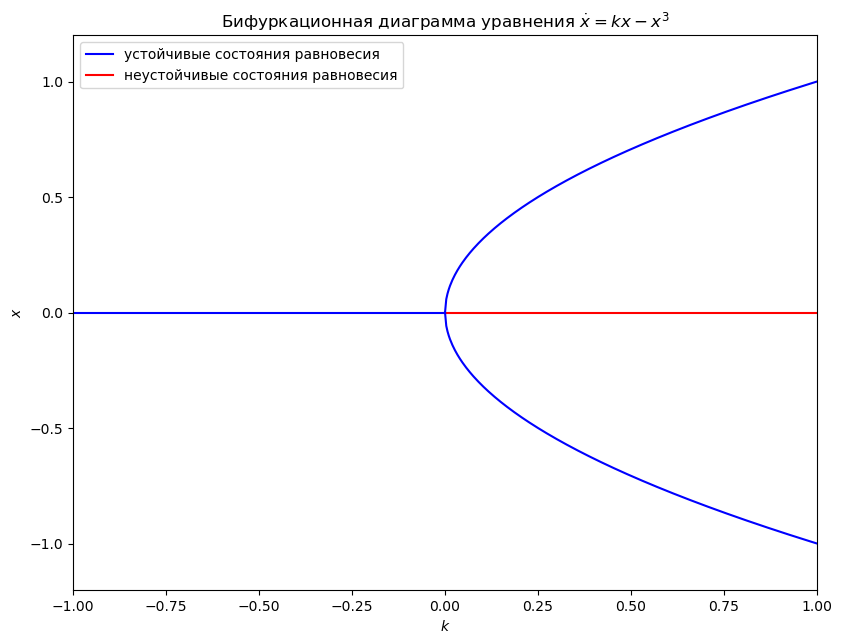

In [114]:
kmin = -1
kmax = 1
xmin = -1.2
xmax = 1.2
blue, = plot([kmin, 0], [0, 0], 'b', label='устойчивые состояния равновесия')
red, = plot([0, kmax], [0, 0], 'r', label='неустойчивые состояния равновесия')
ks = linspace(0, kmax, 301)
plot(ks, sqrt(ks), 'b')
plot(ks, -sqrt(ks), 'b')
axis([kmin, kmax, xmin, xmax])

xlabel(r'$k$')
ylabel(r'$x$')
legend(loc='upper left')
title(r'Бифуркационная диаграмма уравнения $\dot x = k x - x^3$');

## Решение

### 7.1. Бифуркационная диаграмма для маятника `p1`

In [117]:
# Вставьте и запустите код для построения бифуркационной диаграммы

### 7.2. Бифуркационная диаграмма для маятника `p2`

In [119]:
# Вставьте и запустите код для построения бифуркационной диаграммы

### 7.3. Аналитическое условие на $k_0$ и пояснение к заданию 5.4

*Запишите аналитическое условие на $k_0$, и пояснения, что происходит при критическом угле, близком или превышающем 90°, и почему для маятника `p2` оказался возможен подъём из состояния $\varphi = 3\pi$, $\dot\varphi = 0$.*

<a name="sec:pr15"></a>
# Задание 8. Линеаризация обратной связью

В предыдущих заданиях 4 — 7 мы увидели, что маятники `p1` и `p2`, управляемые с помошью внешнего момента и горизонтальной силы соответственно, демонстрируют существенно различное поведение при линейной стратегии управления. Мы увидели, что в двух случаях стабилизации происходит в результате бифуркации «вилка» сверх- и докритического типов. Это был взгляд с точки зрения теории динамических систем. Теперь рассмотрим различия между маятниками со стороны понятийного аппарата собственнно теории управления. Будем делать это постепенно, рассмотрев различные методы синтеза нелинейных стратегий управления. Начнём с метода, который называется **линеаризация обратной связью (_англ_ feedback linearization)**.

Обычно линеаризацией называют процедуру, основанную на разложении нелинейных функций по формуле Тейлора и отбрасывании нелинейных членов. В результате этой процедуры исходным нелинейным системам и уравнениям ставятся в соответствие линейные системы и уравнения. Иными словами, в практических и исследовательских целях исходная нелинейная система заменяется приближённой линейной системой, которая себя ведёт схоже с исходной в окрестности некоторого точного решения исходной нелинейной задачи. В теории управления это позволяет, к примеру, исследовать устойчивость состояний равновесия и синтезировать управления, стабилизирующие исходно неустойчивые состояния равновесия, как мы это делали в предыдущих заданиях. Однако всегда следует помнить, что устойчивость системы управления (и её необходимое качество, например, степень устойчивости), синтезированной на основе линеаризованной системы, может реализовываться лишь в малой окрестности того решения, относительного которого проводилась линеаризация. При этом размеры этой окрестности в общем случае неизвестны. Также методы синтеза систем управления на основе линейной теории позволяют синтезировать лишь линейную часть стратегии управления, в то время как правильно выбранная нелинейная часть может обеспечить лучшее качество управления. Избавится от этих проблем как раз может помочь метод линеаризации обратной связью.

Сначала займёмся только маятником `p1`, который описывается уравнением&nbsp;[$(4)$](description.ipynb#eq:phi)
$$
\ddot \varphi + \nu\dot\varphi - \Omega^2 \sin\varphi = -u
$$
Легко заметить, что единственным нелинейным слагаемым в нём является $\Omega^2 \sin\varphi$. Перенеся это слагаемое в правую часть и сделав замену $u = v + \Omega^2 \sin\varphi$ (такая замена называется преобразование обратной связью), получим новое эквивалентное линейное уравнение
$$
\ddot \varphi + \nu\dot\varphi = -v,
$$
где в качестве управления теперь выступает $v$. Теперь выбирая линейные стратегии управления $v = k_0 \varphi + k_1 \dot\varphi$ будем получать линейные замкнутые системы с предсказуемым поведением и качеством управления во всём пространстве состояний (во всей фазовой плоскости). *Синтезируйте такое стабилизирующее управление для маятника `p1` и приведите два примера (в виде графиков временных зависимостей угла отклонения и управления) для маятника, начинающего своё движение из нижнего положения с нулевой скоростью, когда процесс установления является ангармоническим и квазигармоническим. В качестве целевых линейных систем возьмите $\ddot\varphi + \dot\varphi + 0.2\varphi = 0$ и $\ddot\varphi + 0.2\dot\varphi + \varphi = 0$. Постройте соответствующие фазовые портреты замкнутых систем.*

Нелинейную стратегию управления по состоянию можно задать с помощью класса `StateFeedbackControl`, где в качестве третьего аргумента конструктора выступает стратегия управления (функция, принимающая вектор состояния и возвращающая вектор управления).

## Пример расчёта для нелинейного управления $u = \Omega^2 \sign \varphi$

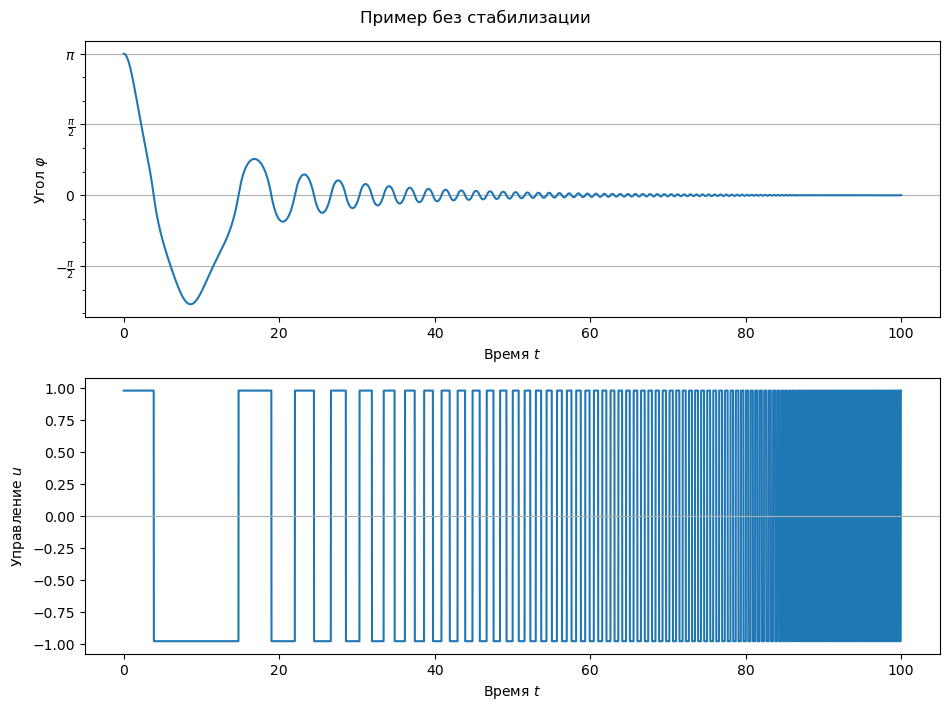

In [125]:
# Управление с k_0 = 0.5, k_1 = 0.7
c = StateFeedbackControl(2, 1, lambda x: [p1.omega**2*sign(x[0])])
# Численное интегрирование методом Рунге — Кутты с выводом управления u
t, s, u = integrate(p1, c, x0=[pi, 0], v0=empty(0), dt=0.01, T=100, N=1,
                    return_control=True)

subplot(2, 1, 1)
plot(t, s[:, 0])
axis_pi_ticks(gca().yaxis, pi/2, pi/6)
grid(axis='y')
xlabel(r'Время $t$')
ylabel(r'Угол $\varphi$')
subplot(2, 1, 2)
plot(t, u[:, 0])
axhline(0, lw=rcParams['grid.linewidth'], ls=rcParams['grid.linestyle'],
        c=rcParams['grid.color'])
xlabel(r'Время $t$')
ylabel(r'Управление $u$')
suptitle(r'Пример без стабилизации')
tight_layout();

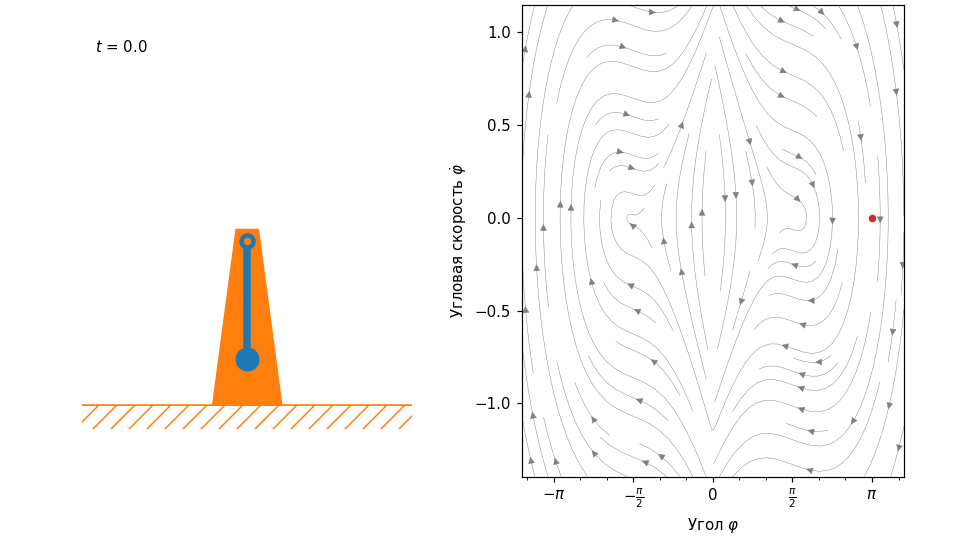

In [126]:
# Построение анимированного изображения gif
anim = animate_pendulum(t, s, phi_lims=(-1.2*pi, 1.2*pi),
                        phase_portrait=[p1, c], cylinder_mode=False, spacing=30,
                        invsec=1, filename='temp/test8.gif')
Image('temp/test8.gif')

# Раскомментируйте для построения видео mp4 (ffmpeg должен быть установлен)
#anim = animate_pendulum(t, s, phi_lims=(-1.2*pi, 1.2*pi),
#                        phase_portrait=[p1, c], cylinder_mode=False, spacing=30,
#                        invsec=1, filename='temp/test8.mp4')
#Video('temp/test8.mp4')

# Раскомментируйте для создания анимации на JavaScript
#anim = animate_pendulum(t, s, phi_lims=(-1.2*pi, 1.2*pi),
#                        phase_portrait=[p1, c], cylinder_mode=False, spacing=30,
#                        invsec=1)
#HTML(anim.to_jshtml())

## Решение

### 8.1. Целевая система $\ddot\varphi + \dot\varphi + 0.2\varphi = 0$

*Запишите аналитическое выражение для синтезированного управления.*

In [130]:
# Вставьте и запустите код для построения графиков временной реализации

In [131]:
# Вставьте и запустите код для построения анимации (необязательно)

In [132]:
# Вставьте и запустите код для построения фазового портрета

### 8.2. Целевая система $\ddot\varphi + 0.2\dot\varphi + \varphi = 0$

*Запишите аналитическое выражение для синтезированного управления.*

In [135]:
# Вставьте и запустите код для построения графиков временной реализации

In [136]:
# Вставьте и запустите код для построения анимации (необязательно)

In [137]:
# Вставьте и запустите код для построения фазового портрета

<a name="sec:pr9"></a>
# Задание 9. Метод обратной задачи динамики

Общая теория линеаризации обратной связью достаточно сложна для начала курса теории управления и основана на методах дифференциальной геометрии, в частности на теореме Фробениуса, и, как мы увидем далее для маятника `p2`, такая линеаризация возможна не для всех систем. В предыдущем [задании 8](#sec:pr8) нам удалось провести линеаризацию обратной связью так легко, потому что управление выражалось явно через угол $\varphi$ и его временные производные. Фактически уравнение&nbsp;[$(4)$](description.ipynb#eq:phi) явно выражает управление $u$,
$$
  u = -\ddot \varphi - \nu\dot\varphi + \Omega^2 \sin\varphi.
$$
По сути такое выражение даёт решение **обратной задачи динамики (_англ_ inverse problem)**, то есть задачи о том, какими должны быть внешние силы (в нашем случае момент сил), обеспечивающие заданное движение системы. При этом можно задаваться как конкретным движением $\varphi(t)$, находя подходящее **программное управление** $u(t)$, так и некоторой целевой (желаемой) замкнутой системой $\ddot\varphi = g(\varphi, \dot\varphi, t)$, которой должен подчиняться маятник под управлением. В самом деле, если выбрать стратегию управления
$$
  u = -g(\varphi, \dot\varphi, t) - \nu\dot\varphi + \Omega^2 \sin\varphi,
$$
то замкнутая система как раз примет желаемый вид. А если положить $g(\varphi, \dot\varphi, t) = -k_0\varphi - (k_1 + \nu) \dot\varphi$, получим систему линеаризованную обратной связью из предыдущего задания.

В случае если целевое движение описывается системой меньшей размерности, чем два, то можно добавить дополнительные динамические звенья слежения, увеличив таким образом размерность системы до двух. Например, для системы $\dot\varphi = h(\varphi, t)$ записываем уравнение $\tau_{\mathrm{g}} \dot e + e = 0$ для ошибки $e = \dot\varphi - h(\varphi, t)$, где $\tau_{\mathrm{g}} > 0$&nbsp;— время выхода на целевое решение. Аналогично для целевого движения $\varphi = f(t)$ можно записать уравение второго порядка $(\alpha\tau_{\mathrm{g}}^2/4) \ddot e + \tau_{\mathrm{g}} \dot e + e = 0$ для ошибки $e = \varphi - f(t)$ с характерными временами $\tau_{\mathrm{g}} > 0$ и параметром $\alpha > 0$, который определяет наличие и частоту переколебаний, а также относительную величину перерегулирования при выходе на целевой режим.

*Используя метод обратной задачи динамики, синтезируйте управление (то есть запишите соответствующие формулы), которое реализует заданные установившиеся режимы*:
- 1\) *равномерное вращение маятника с заданной угловой скоростью $\Omega_{\mathrm{g}}$*;
- 2\) *отклонение маятника на постоянный угол $\varphi_{\mathrm{g}}$*;
- 3\) *гармонические колебания угла отклонения маятника от вертикали с амплитудой $\varphi_{\mathrm{g}}$ и частотой $\Omega_{\mathrm{g}}$*.

*Для всех трёх примеров реализуйте регуляторы с помощью компьютерной симуляции (используйте класс `StateFeedbackControl`), постройте графики зависимостей угла отклонения и управления от времени и фазовые потреты замкнутых систем (на фазовых портретах отметьте устойчивые и неустойчивые аттракторы: состояния равновесия и предельные циклы). В симуляциях положите $\tau_{\mathrm{g}} = 10$, $\alpha = 1$, $\Omega_{\mathrm{g}} = 1$, $\varphi_{\mathrm{g}} = \pi/2$. В качестве начальных условий выберите маятник, стартующий из нижнего положения с нулевой скоростью. Для первого примера проверьте, что произойдёт, если при построении регуляторов была допущена ошибка в определении значения $\Omega$ и оно оказалось занижено или завышено на 20 \%.*

## Решение

### 9.1. Целевой режим с равномерным вращением маятника

*Запишите вывод аналитических выражений для синтезированного управления.*

In [143]:
# Вставьте и запустите код для построения графиков временной реализации

In [144]:
# Вставьте и запустите код для построения анимации (необязательно)

In [145]:
# Вставьте и запустите код для построения фазового портрета

### 9.2. Целевой режим с отклонением маятника на постоянный угол

*Запишите вывод аналитических выражений для синтезированного управления.*

In [148]:
# Вставьте и запустите код для построения графиков временной реализации

In [149]:
# Вставьте и запустите код для построения анимации (необязательно)

In [150]:
# Вставьте и запустите код для построения фазового портрета

### 9.3. Целевой режим с гармоническими автоколебаниями маятника

*Запишите вывод аналитических выражений для синтезированного управления.*

In [153]:
# Вставьте и запустите код для построения графиков временной реализации

In [154]:
# Вставьте и запустите код для построения анимации (необязательно)

In [155]:
# Вставьте и запустите код для построения фазового портрета

### 9.4. Целевой режим с равномерным вращением маятника при ошибке в определении $\Omega$ 

In [157]:
# Вставьте и запустите код для построения графиков временной реализации

In [158]:
# Вставьте и запустите код для построения анимации (необязательно)

*Запишите аналитические выражения для отрицательных корней характеристических полиномов уравнений, линеаризованных около сёдел.*

In [160]:
# Вставьте и запустите код для построения фазового портрета

*Запишите вывод о том, что происходит, если допушена ошибка идентификации параметра $\Omega$.*

<a name="sec:pr10"></a>
# Задание 10. Периодические по углу стратегии управления

С помощью метода линеаризации обратной связью в [задании 8](#sec:pr8) были построены регуляторы, которые одновременно являются стабилизирующими (удерживают маятник в вертикальном положении при малых отклонениях от него) и подъёмными (приводят маятник из любого состояния в окрестность верхнего положения равновесия). Однако для данной конкретной системы недостатком такого регулятора может являться то, что этот регулятор оказывается чувствительным к числу оборотов, то есть различает углы, отличающиеся на $2\pi n$, $n \in \mathbb Z$. От этого недостатка можно избавиться, если синтезировать регулятор с замкнутой системой, инвариантной относительно замены $\varphi \mapsto \varphi + 2\pi$. Для этого опять можно использовать метод обратной динамики. В качестве замкнутой системы можно рассмотреть систему, аналогичную исходной незамкнутой, но с другим знаком коэффициента перед $\sin\varphi$: $\ddot\varphi + a\dot\varphi + b\sin\varphi = 0$, где $a$ и $b$&nbsp;— постоянные положительные коэффициенты. Для того чтобы иметь возможность сравнить с [заданием 8](#sec:pr8) можно выбрать значения коэффициентов так, чтобы линеаризации замкнутых систем совпадали с целевыми линейными системами в [задании 8](#sec:pr8), то есть $a = 1$, $b = 0.2$ и $a = 0.2$, $b = 1$. *Постройте такие регуляторы для маятника `p1`. Проведите компьютерные симуляции для начальных условий $\varphi(0) = 5\pi$, $\dot\varphi(0) = 0.001$. Постройте фазовые портреты.*

Как видно, недостатком полученных систем является наличие дополнительного неустойвого состояния равновесия, вблизи которого система может проводить значительное время. Поэтому другим вариантом является использование систем с разрывами, например, $\ddot\varphi + a\dot\varphi + b\mathop{\mathrm{sawtooth}}\varphi$, где $\mathop{\mathrm{sawtooth}} x = 2\arctg \tg(x/2) = \pi - \left[(\pi - x) \mathrel{\mathrm{mod}} 2\pi\right]$&nbsp;— функция-пила. *Постройте и такие регуляторы  для маятника `p1`. Проведите компьютерные симуляции для начальных условий $\varphi(0) = 5\pi$, $\dot\varphi(0) = 0.001$. Постройте фазовые портреты.*

## Решение

### 10.1 Целевая система $\ddot\varphi + \dot\varphi + 0.2\sin\varphi = 0$

*Запишите аналитическое выражение для синтезированного управления.*

In [167]:
# Вставьте и запустите код для построения графиков временной реализации

In [168]:
# Вставьте и запустите код для построения анимации (необязательно)

In [169]:
# Вставьте и запустите код для построения фазового портрета

### 10.2. Целевая система $\ddot\varphi + 0.2\dot\varphi + \sin\varphi = 0$

*Запишите аналитическое выражение для синтезированного управления.*

In [172]:
# Вставьте и запустите код для построения графиков временной реализации

In [173]:
# Вставьте и запустите код для построения анимации (необязательно)

In [174]:
# Вставьте и запустите код для построения фазового портрета

### 10.3. Целевая система $\ddot\varphi + \dot\varphi + 0.2\mathop{\mathrm{sawtooth}}\varphi = 0$

*Запишите аналитическое выражение для синтезированного управления.*

In [177]:
# Вставьте и запустите код для построения графиков временной реализации

In [178]:
# Вставьте и запустите код для построения анимации (необязательно)

In [179]:
# Вставьте и запустите код для построения фазового портрета

### 10.4. Целевая система $\ddot\varphi + 0.2\dot\varphi + \mathop{\mathrm{sawtooth}}\varphi = 0$

*Запишите аналитическое выражение для синтезированного управления.*

In [182]:
# Вставьте и запустите код для построения графиков временной реализации

In [183]:
# Вставьте и запустите код для построения анимации (необязательно)

In [184]:
# Вставьте и запустите код для построения фазового портрета

<a name="sec:pr11"></a>
# Задание 11. Показатели качества

Кроме собственно требования устойчивости (стабилизации верхнего положения равновесия), к системе управления могут предъявляться и иные требования, в совокупности именуемые **качеством системы управления (_англ._ performance of a control system)**. Это могут быть требования к самому управлению $u$, например ограничение на прикладываемую силу, то есть на максимальное по времени значение модуля, $u_{\max} = \max_{t > 0}\left|u(t)\right|$, для определённых начальных отклонений.
Может накладываться и ограничение на энергию, затраченную на приведение, то есть ограничение на $W = \int_0^{\inf} u^2(t) \,\D{t}$. Часто ставятся ограничения на характеристики переходного процесса, например на величину перерегулирования, то есть на максимальную по времени величину отклонения маятника в сторону, противоположную начальному отклонению. Могут задаваться как требования на относительную величину перегулирования $\sigma = -\min_{t > 0} \frac{\varphi(t)}{\varphi(0)}$ (обычно, выражаемую в процентах), так и на абсолютную $\sigma\left|\varphi(0)\right|$. Важным показателем качества является время установления (время регулирования), которое можно определять различными способами, например как то верхнюю грань времён, для которых отклонение больше некоторой доли $\beta$ начального отклонения. Здесь мы будем использовать определение
$$\tau_{\mathrm{r}} = \frac 1{\ln(1/\beta)}\sup_{d(t) > \beta d(0)} t$$
с $\beta = 5\ \%$ и $d(t) = \sqrt{\dot\varphi^2(t) + 2\Omega^2\sin^2(\varphi/2)}$&nbsp;— вариант расстояния на фазовом цилиндре между точками $(\varphi, \dot\varphi)$ и $(0, 0)$. Нормирующий множитель $\frac 1{\ln(1/\beta)}$ здесь введён, для того чтобы для экспоненциального установления $d(t) \propto \exp(-\gamma t)$ имело место $\tau_{\mathrm{r}} = 1/\gamma$. Для сильно зашумлённых сигналов удобно определять время установления интегрально, например как
$$\tau_{\mathrm{est}} = 2\frac{\int_0^{\infty} t d^2(t)\,\D t}{\int_0^{\infty} d^2(t)\,\D t}.$$
Для экспоненциального затухания $d(t) \propto \exp(-\gamma t)$ оба определения дают одну и ту же величину $\tau_{\mathrm{est}} = \tau_{\mathrm{r}} = 1/\gamma$.
В определение $\tau_{\mathrm{est}}$ входит другой часто используемый показатель&nbsp;— интегральная квадратичная ошибка $J = \int_0^{\infty} d^2(t)\,\D t$, также характеризующая скорость установления. В случае если бассейн притяжения целевого режима не совпадает со всем фазовым пространством, можно рассматривать характеристики этого бассейна, как например критический начальный угол $\varphi_{\mathrm{c}}$ для маятника `p2`, введённый в [задании 7](#sec:pr7), или аналогично вводимую критическую начальную угловую скорость.

*Расширив пример, приведённый ниже, рассчитайте показатели качества $u_{\max}$, $W$, $\sigma$, $\tau_{\mathrm{r}}$, $\tau_{\mathrm{est}}$ и $J_0$ как функцию коэффициента $b \in [0.1\Omega^2, 5\Omega^2]$ для целевых замкнутых систем из предыдущего [задания 9](#sec:pr9). Рассмотрите начальные условия $\varphi(0) = 0.1\pi$, $0.5\pi$, $0.9\pi$ для значений коэффциентов $a = 0.2$ и $a = 1$. Какие рекомендации можно дать относительно выбора коэффциентов $a$ и $b$ и вида стратегии управления (из двух рассмотренных).*

## Пример построения показателей качества $u_{\max}$ и $W$ для линейных стратегий управления

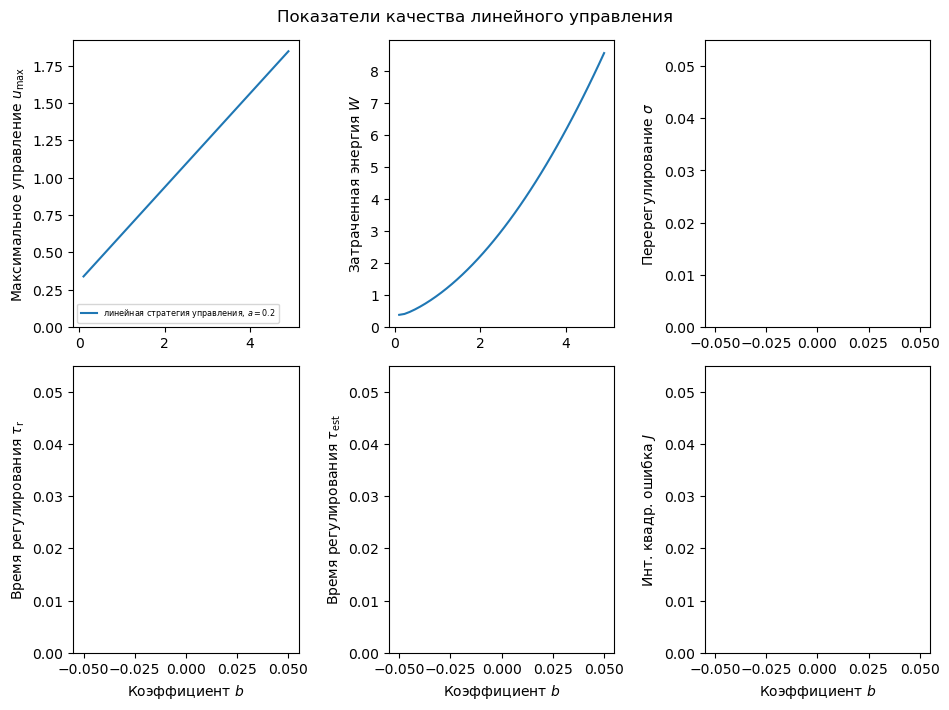

In [188]:
# Функция для нахождения расстояния на цилиндре
def cylinder_distance(s):
    return sqrt(s[:, 1]**2/2 + 2*p1.omega**2*sin(s[:, 0]/2)**2)

# Расчёт показателей качества для управления c и начальных условий x0
def performance_indicators(c, x0):
    t, s, u = integrate(p1, c, x0=x0, v0=empty(0), dt=0.01, T=300, N=1,
                        return_control=True,
                        stop_condition=lambda x, t: norm(x) < 1e-8)
    umax = amax(abs(u[:, 0]))
    W = trapz(u[:, 0]**2, t)
    sigma = nan # nan везде необходимо заменить на правильный код
    taur = nan
    J0 = nan
    tauest = nan / J0
    return (umax, W, sigma, taur, tauest, J0)

# Значения коэффциента b
bs = linspace(0.1*p1.omega**2, 5*p1.omega**2, 40)

# Расчёт показателей для линейных управлений в цикле по всем значениям b из bs
# для начальных условий $\varphi(0) = 0.1\pi$, $\dot\varphi(0) = 0$ и $a = 0.2$
a = 0.2
indicators1 = [performance_indicators(
    StateFeedbackControl(2, 1, lambda x: [(a-p1.nu)*x[1]
                                          + (b+p1.omega**2)*x[0]]),
    [0.1*pi, 0]) for b in bs]
indicators1 = array(indicators1)

subplot(2, 3, 1)
plot(bs, indicators1[:, 0], label='линейная стратегия управления, $a = 0.2$')
# В заданиях ниже на каждой панели нужно изобразить показатели для a = 0.2 и 1, 
# а также для двух типов замкнутых нелинейных система (всего по 4 графика на
# панель)
gca().set_ylim(bottom=0) # Нижний предел по вертикальной оси устанавливается в 0
                         # для наглядности
legend(fontsize='xx-small')
ylabel(r'Максимальное управление $u_{\max}$')

subplot(2, 3, 2)
plot(bs, indicators1[:, 1])
gca().set_ylim(bottom=0)
ylabel(r'Затраченная энергия $W$')

subplot(2, 3, 3)
plot(bs, indicators1[:, 2])
gca().set_ylim(bottom=0)
ylabel(r'Перерегулирование $\sigma$')

subplot(2, 3, 4)
plot(bs, indicators1[:, 3])
gca().set_ylim(bottom=0)
xlabel(r'Коэффициент $b$')
ylabel(r'Время регулирования $\tau_{\mathrm{r}}$')

subplot(2, 3, 5)
plot(bs, indicators1[:, 4])
gca().set_ylim(bottom=0)
xlabel(r'Коэффициент $b$')
ylabel(r'Время регулирования $\tau_{\mathrm{est}}$')

subplot(2, 3, 6)
plot(bs, indicators1[:, 5])
gca().set_ylim(bottom=0)
xlabel(r'Коэффициент $b$')
ylabel(r'Инт. квадр. ошибка $J$')
suptitle(r'Показатели качества линейного управления')
tight_layout();

## Решение

### 11.1. Показатели качества при $\varphi(0) = 0.1\pi$, $\dot\varphi(0) = 0$

In [191]:
# Вставьте и запустите код для построения графиков зависимостей показателей качества от параметра управления

### 11.2. Показатели качества при $\varphi(0) = 0.5\pi$, $\dot\varphi(0) = 0$

In [193]:
# Вставьте и запустите код для построения графиков зависимостей показателей качества от параметра управления

### 11.3. Показатели качества при $\varphi(0) = 0.9\pi$, $\dot\varphi(0) = 0$

In [195]:
# Вставьте и запустите код для построения графиков зависимостей показателей качества от параметра управления